# Main notebook for Kunskapskontroll 2

In [9]:
import joblib
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
rf_model_smallcv = joblib.load("RandomForest_small_CV.pkl")

In [3]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
y_pred_rf_small_test = rf_model_smallcv.predict(X_test)

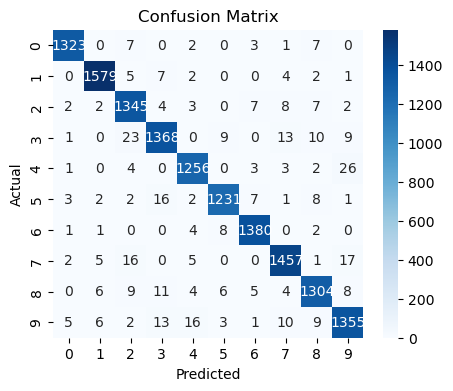

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_small_test)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
print(classification_report(y_test, y_pred_rf_small_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:
print(f"Final Random Forest Test Accuracy with small data set sample with Gridsearch and CV 3: {accuracy_score(y_test, y_pred_rf_small_test):.4f}")

Final Random Forest Test Accuracy with small data set sample with Gridsearch and CV 3: 0.9713
